In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster 



In [2]:
# Importar archivo para trabajar
df_google = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Datos_Completos_google.csv')

In [3]:
df_google

Unnamed: 0   latitude   longitude  \
0              12  33.381416  -86.807040   
1              14  33.100547  -86.861968   
2              18  32.631013  -85.437473   
3              84  34.843859  -86.711656   
4             122  34.681722  -85.681300   
...           ...        ...         ...   
95054     1084531  47.042392 -122.936001   
95055     1084536  48.512617 -121.469734   
95056     1084542  48.179205 -117.044331   
95057     1084545  47.878470 -122.166333   
95058     1084554  47.543108 -122.019312   

                                                category  \
0                                       Pizza restaurant   
1      Pizza delivery, Chicken wings restaurant, Pizz...   
2            Asian fusion restaurant, Dessert restaurant   
3      Fast food restaurant, Breakfast restaurant, Bu...   
4                                    American restaurant   
...                                                  ...   
95054  Asian fusion restaurant, Fast food restaurant,...   
95055  Restaurant, ATM, Country food restaurant, Stea...   
95056               Pizza restaurant, Italian restaurant   
95057                                   Sushi restaurant   
95058  Sandwich shop, Caterer, Fast food restaurant, ...   

                                                  name      Estado  \
0      California Pizza Kitchen at Riverchase Galleria     Alabama   
1                                            Pizza Hut     Alabama   
2                                              Cheetos     Alabama   
3                                            Taco Bell     Alabama   
4                         Doris Jean's Country Kitchen     Alabama   
...                                                ...         ...   
95054                                             MiSo  Washington   
95055                     Glacier Peak Resort & Winery  Washington   
95056                                    Newport Pizza  Washington   
95057                      Fatty Fish Sushi Restaurant  Washington   
95058                                     Jimmy John's  Washington   

       avg_rating  num_of_reviews  
0             4.1              18  
1             3.2              78  
2             4.0              26  
3             3.0              17  
4             4.1              48  
...           ...             ...  
95054         4.7              54  
95055         4.2              96  
95056         4.1             108  
95057         4.6             338  
95058         3.8             117  

[95059 rows x 8 columns]

In [4]:
df_google.shape

(95059, 8)

In [5]:
df_google.duplicated().sum()

0

In [6]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95059 entries, 0 to 95058
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      95059 non-null  int64  
 1   latitude        95059 non-null  float64
 2   longitude       95059 non-null  float64
 3   category        95059 non-null  object 
 4   name            95059 non-null  object 
 5   Estado          95059 non-null  object 
 6   avg_rating      95059 non-null  float64
 7   num_of_reviews  95059 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 5.8+ MB


In [8]:
#proporciona una descripción rápida y útil de las estadísticas de la columna category	
df_google['category'].describe()

count                                                 95059
unique                                                19937
top       Sandwich shop, Caterer, Fast food restaurant, ...
freq                                                   6024
Name: category, dtype: object

In [9]:
#proporciona una descripción rápida y útil de las estadísticas de la columna name
df_google['name'].describe()

count      95059
unique     60547
top       Subway
freq        6695
Name: name, dtype: object

In [10]:
#verificamos los valores unicos en la columna Estado

df_google['Estado'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington'], dtype=object)

# ANALISIS EXPLORATORIO POR CATEGORIA

In [12]:
# Calcular la cantidad de veces que aparece cada categoría
category_counts = df_google['category'].value_counts()

# Encontrar la categoría con la mayor cantidad
most_common_category = category_counts.idxmax()

# Filtrar el DataFrame original en función de la categoría con la mayor cantidad
most_common_category_df = df_google[df_google['category'] == most_common_category]

# Mostrar el DataFrame resultante
most_common_category_df

Unnamed: 0   latitude   longitude  \
9             354  33.421914  -86.675909   
34            955  30.703378  -88.125731   
35            988  33.495116  -86.807479   
57           1535  33.343412  -86.437774   
62           1662  33.333759  -86.917713   
...           ...        ...         ...   
94972     1083875  47.320931 -122.587518   
94984     1083970  47.657983 -117.338405   
95029     1084289  47.324423 -122.220990   
95037     1084341  48.093246 -122.188274   
95038     1084342  48.223620 -122.474407   

                                                category    name      Estado  \
9      Sandwich shop, Caterer, Fast food restaurant, ...  Subway     Alabama   
34     Sandwich shop, Caterer, Fast food restaurant, ...  Subway     Alabama   
35     Sandwich shop, Caterer, Fast food restaurant, ...  Subway     Alabama   
57     Sandwich shop, Caterer, Fast food restaurant, ...  Subway     Alabama   
62     Sandwich shop, Caterer, Fast food restaurant, ...  Subway     Alabama   
...                                                  ...     ...         ...   
94972  Sandwich shop, Caterer, Fast food restaurant, ...  Subway  Washington   
94984  Sandwich shop, Caterer, Fast food restaurant, ...  Subway  Washington   
95029  Sandwich shop, Caterer, Fast food restaurant, ...  Subway  Washington   
95037  Sandwich shop, Caterer, Fast food restaurant, ...  Subway  Washington   
95038  Sandwich shop, Caterer, Fast food restaurant, ...  Subway  Washington   

       avg_rating  num_of_reviews  
9             3.0              24  
34            4.2              28  
35            2.9              33  
57            4.1              44  
62            3.9              58  
...           ...             ...  
94972         4.1              68  
94984         3.4              38  
95029         3.7             158  
95037         3.6              76  
95038         2.7              53  

[6024 rows x 8 columns]

In [19]:
unique_categories = df_google['category'].unique()
unique_categories

array(['Pizza restaurant',
       'Pizza delivery, Chicken wings restaurant, Pizza restaurant, Pizza Takeout',
       'Asian fusion restaurant, Dessert restaurant', ...,
       'Restaurant, Hawaiian restaurant, Seafood restaurant, Sushi restaurant',
       'Asian fusion restaurant, Fast food restaurant, Health food restaurant',
       'Restaurant, ATM, Country food restaurant, Steak house, Winery'],
      dtype=object)

In [24]:
# Filtrar las categorías que no son 'Restaurant', 'Caterer' o '=Catering'
separated_df = df_google[(df_google['category'] != 'Restaurant') & 
                            (df_google['category'] != 'Caterer') &
                            (df_google['category'] != '=Catering')]

# Mostrar el DataFrame resultante
separated_df


Unnamed: 0   latitude   longitude  \
0              12  33.381416  -86.807040   
1              14  33.100547  -86.861968   
2              18  32.631013  -85.437473   
3              84  34.843859  -86.711656   
4             122  34.681722  -85.681300   
...           ...        ...         ...   
95054     1084531  47.042392 -122.936001   
95055     1084536  48.512617 -121.469734   
95056     1084542  48.179205 -117.044331   
95057     1084545  47.878470 -122.166333   
95058     1084554  47.543108 -122.019312   

                                                category  \
0                                       Pizza restaurant   
1      Pizza delivery, Chicken wings restaurant, Pizz...   
2            Asian fusion restaurant, Dessert restaurant   
3      Fast food restaurant, Breakfast restaurant, Bu...   
4                                    American restaurant   
...                                                  ...   
95054  Asian fusion restaurant, Fast food restaurant,...   
95055  Restaurant, ATM, Country food restaurant, Stea...   
95056               Pizza restaurant, Italian restaurant   
95057                                   Sushi restaurant   
95058  Sandwich shop, Caterer, Fast food restaurant, ...   

                                                  name      Estado  \
0      California Pizza Kitchen at Riverchase Galleria     Alabama   
1                                            Pizza Hut     Alabama   
2                                              Cheetos     Alabama   
3                                            Taco Bell     Alabama   
4                         Doris Jean's Country Kitchen     Alabama   
...                                                ...         ...   
95054                                             MiSo  Washington   
95055                     Glacier Peak Resort & Winery  Washington   
95056                                    Newport Pizza  Washington   
95057                      Fatty Fish Sushi Restaurant  Washington   
95058                                     Jimmy John's  Washington   

       avg_rating  num_of_reviews  
0             4.1              18  
1             3.2              78  
2             4.0              26  
3             3.0              17  
4             4.1              48  
...           ...             ...  
95054         4.7              54  
95055         4.2              96  
95056         4.1             108  
95057         4.6             338  
95058         3.8             117  

[95059 rows x 8 columns]

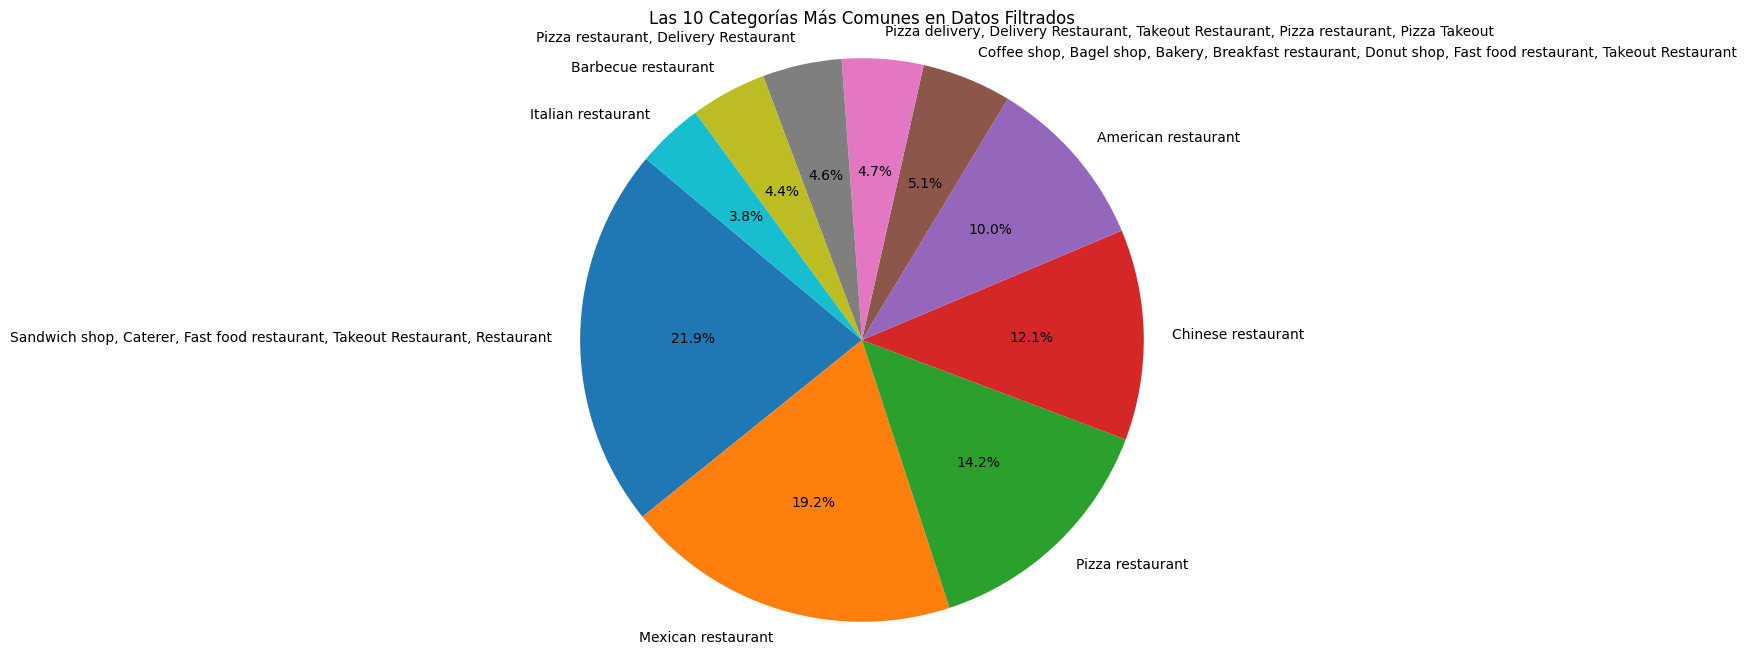

In [25]:

# Obtener la cuenta de cada categoría en el DataFrame filtrado
category_counts = separated_df['category'].value_counts()

# Tomar las 10 categorías más comunes
top_10_categories = category_counts.head(10)

# Crear un gráfico de pastel con las 10 categorías más comunes
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Las 10 Categorías Más Comunes en Datos Filtrados')
plt.axis('equal')
plt.show()


# Las 10 Categorías Más Comunes en Datos Filtrados

Este gráfico de pastel ofrece una representación visual de las categorías más predominantes en el DataFrame separated_df, después de haber aplicado un filtro específico para excluir ciertas categorías. El objetivo es identificar y destacar las 10 categorías que tienen una mayor presencia dentro del subconjunto de datos filtrado.

El gráfico de pastel se divide en 10 segmentos, cada uno etiquetado con el nombre de una categoría específica. Cada segmento se colorea de manera única y se acompaña de un porcentaje que indica la proporción que representa respecto al total de categorías en el DataFrame filtrado.

Los resultados de este análisis permiten visualizar claramente las categorías más destacadas en el subconjunto de datos filtrado. Esto puede proporcionar información valiosa sobre las áreas temáticas más relevantes o populares en el contexto de los datos filtrados.

Este tipo de visualización es especialmente útil cuando deseas comprender rápidamente qué categorías tienen mayor relevancia dentro de un conjunto de datos específico después de aplicar un filtro. Ayuda a identificar tendencias o enfoques predominantes en el conjunto de datos resultante.

En resumen, el gráfico de pastel presenta de manera efectiva las 10 categorías más comunes en los datos filtrados, lo que puede servir como punto de partida para análisis más detallados o decisiones basadas en datos dentro de ese subconjunto.

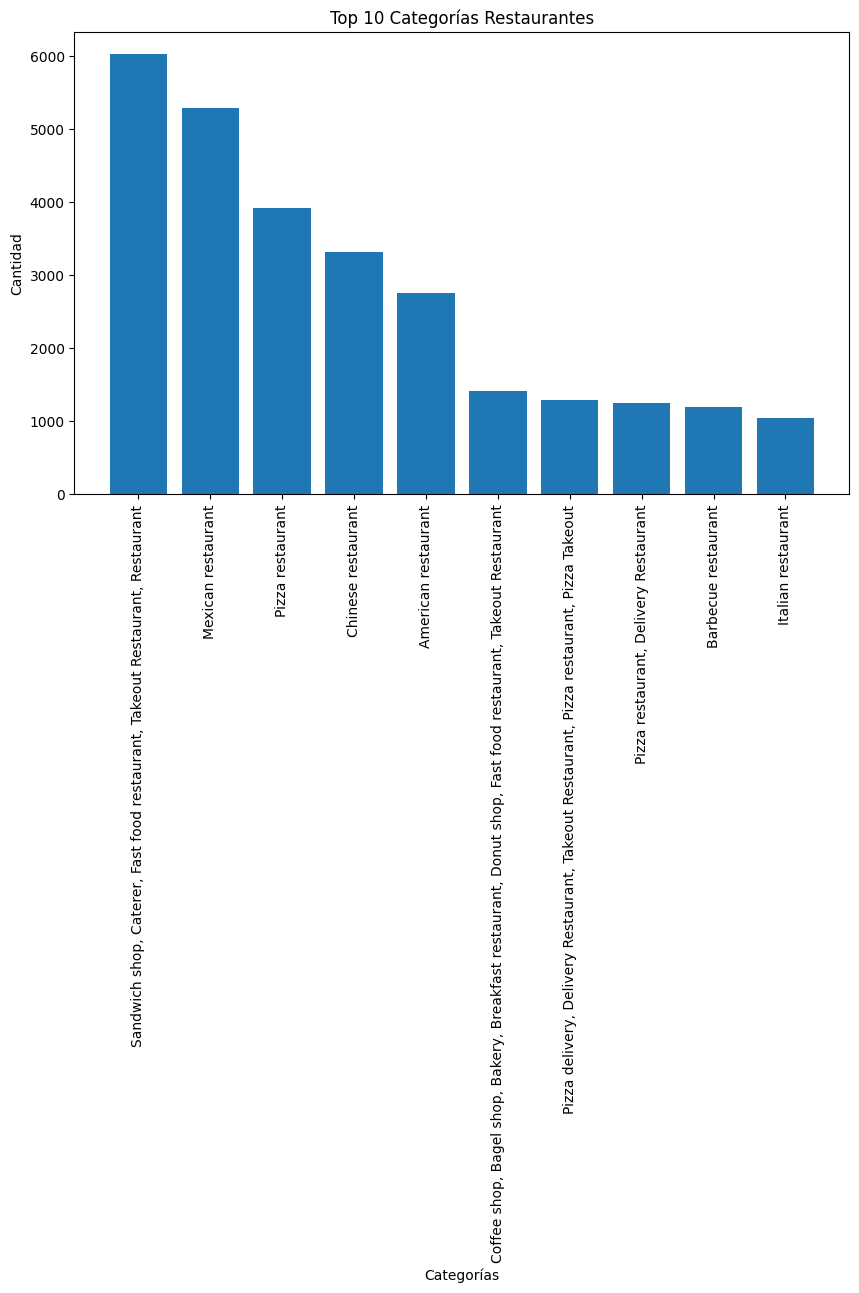

In [26]:

# Calcula el recuento de cada categoría
category_counts = separated_df['category'].value_counts()

# Define un umbral para determinar qué categorías son extremas o atípicas
umbral = 10  # Puedes ajustar este valor según tus criterios

# Filtra las categorías extremas o atípicas
extreme_categories = category_counts[(category_counts < umbral) | (category_counts > umbral)]

# Selecciona las primeras 10 categorías extremas o atípicas
top_10_extreme_categories = extreme_categories.head(10)

# Crea un nuevo DataFrame con las primeras 10 categorías extremas o atípicas y su recuento
top_10_extreme_categories_df = pd.DataFrame({'Category': top_10_extreme_categories.index, 'Count': top_10_extreme_categories.values})

# Grafica las primeras 10 categorías extremas o atípicas
plt.figure(figsize=(10, 6))
plt.bar(top_10_extreme_categories_df['Category'], top_10_extreme_categories_df['Count'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Top 10 Categorías Restaurantes')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


# FRANQUICIAS EXITOSAS ESTADOS UNIDOS

In [27]:
# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = df_google['name'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1].index.tolist()

# Mostrar las franquicias
print("Franquicias encontradas:")
for franquicia in franquicias:
    print(franquicia)


Franquicias encontradas:
Subway
Dunkin'
Domino's Pizza
Pizza Hut
Papa John's Pizza
McDonald's
Starbucks
Little Caesars Pizza
Jimmy John's
Burger King
Taco Bell
QuikTrip
Wendy's
Chick-fil-A
KFC
Wawa
Smoothie King
Chipotle Mexican Grill
Dunkin
Jersey Mike's Subs
Marco's Pizza
Pizza Hut Express
Papa Murphy's | Take 'N' Bake Pizza
Panda Express
Sonic Drive-In
Arby's
Popeyes Louisiana Kitchen
Cold Stone Creamery
Wingstop
Holiday Stationstores
China Wok
IHOP
Long John Silver's
Dairy Queen Grill & Chill
Charleys Cheesesteaks
Einstein Bros. Bagels
Five Guys
Carvel
Hungry Howie's Pizza
Papa Murphy's Take 'N' Bake Pizza
Denny's
Rita's Italian Ice & Frozen Custard
Hardee's
Waffle House
Royal Farms
A&W Restaurant
Dickey's Barbecue Pit
Quiznos
Panera Bread
China King
Caribou Coffee
Scooter's Coffee
Sbarro
Thorntons
Applebee's Grill + Bar
SUBWAY®Restaurants
Maverik Adventure's First Stop
Church's Chicken
Moe's Southwest Grill
Jack in the Box
Godfather's Pizza
Buffalo Wild Wings
Jet's Pizza
China Hou

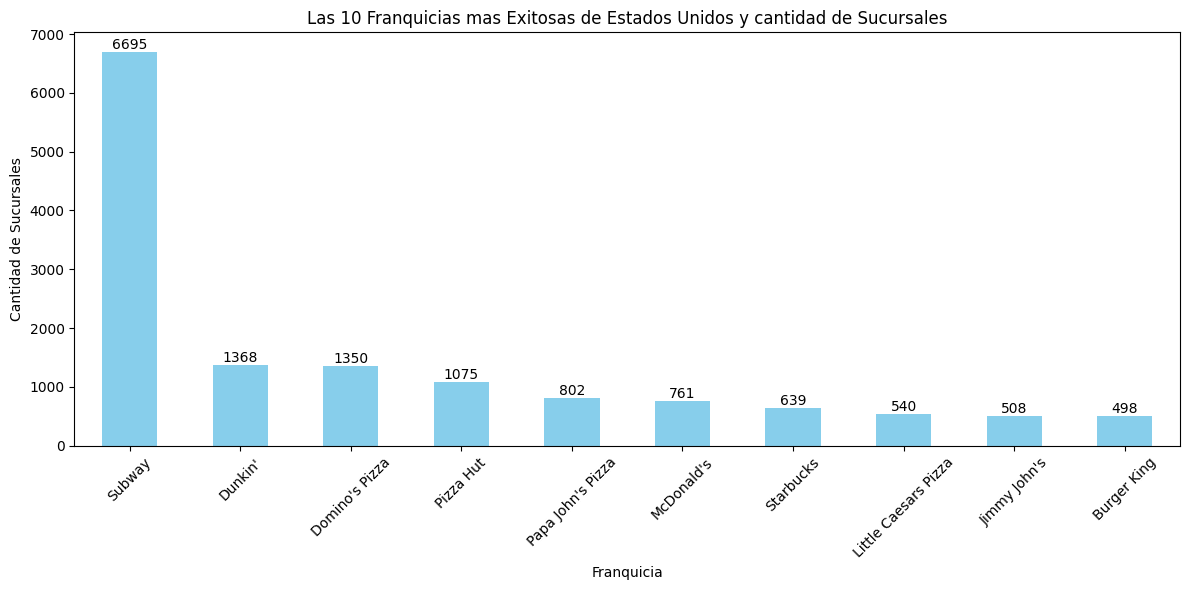

In [29]:
# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = df_google['name'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1]

# Limitar a las 10 franquicias más comunes
top_10_franquicias = franquicias.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6)) 
top_10_franquicias.plot(kind='bar', color='skyblue')
plt.xlabel('Franquicia')  
plt.ylabel('Cantidad de Sucursales') 
plt.title('Las 10 Franquicias mas Exitosas de Estados Unidos y cantidad de Sucursales')  
plt.xticks(rotation=45)  

# Agregar etiquetas con el número exacto de sucursales en las barras
for i, v in enumerate(top_10_franquicias):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Las 10 Franquicias mas exitosas de Estados Unidos y cantidad de Sucursales

Este gráfico de barras presenta las 10 franquicias de restaurantes más comunes en estados densamente poblados de los Estados Unidos, basándose en la frecuencia de aparición en el conjunto de datos y el número exacto de sucursales en cada una de ellas. Estas franquicias representan una variedad de opciones culinarias y son reconocidas por su presencia extendida en áreas urbanas y metropolitanas.

1. Subway (6695 Sucursales): Subway es una cadena de restaurantes de comida rápida famosa por sus submarinos o sándwiches sub. Se destaca por ofrecer opciones de comida rápida más saludables y es una de las franquicias más extendidas a nivel mundial.

2. Dunkin' (1368 Sucursales): Dunkin' es conocida por sus donas, café y otros productos de panadería. Es un lugar popular para el desayuno y el café.

3. Domino's Pizza (1350 Sucursales): Domino's Pizza es una franquicia de pizza conocida por su entrega rápida y su variedad de opciones de pizza.

4. Pizza Hut (1075 Sucursales): Pizza Hut es una franquicia de pizza conocida por sus pizzas variadas y sus opciones de entrega a domicilio. Ofrece una amplia gama de pizzas y otros acompañamientos.

5. Papa John's Pizza (802 Sucursales): Papa John's Pizza es otra franquicia de pizza que ofrece una amplia variedad de pizzas y productos relacionados.

6. McDonald's (761 Sucursales): McDonald's es una de las cadenas de comida rápida más icónicas y reconocibles en todo el mundo. Ofrece una amplia variedad de hamburguesas, papas fritas y otros productos.

7. Starbucks (639 Sucursales): Starbucks es conocida por su café de alta calidad y una variedad de bebidas. Es un lugar popular para los amantes del café.

8. Little Caesars Pizza (540 Sucursales): Little Caesars es una franquicia de pizza conocida por su eslogan "Pizza Pizza" y su enfoque en ofrecer pizza de calidad a precios asequibles.

9. Jimmy John's (508 Sucursales): Jimmy John's es una cadena de restaurantes de comida rápida que se especializa en sándwiches.

10. Burger King (498 Sucursales): Burger King es otra cadena de comida rápida conocida por sus hamburguesas y productos relacionados.

Esta lista proporciona una visión completa de las franquicias de Estados Unidos, destacando su presencia y alcance en función del número de sucursales. Estos datos son valiosos para  comprender la diversidad de opciones culinarias  y evaluar las oportunidades de inversión o expansión en la industria.

# ANALISIS DE LA FRANQUICIA SUBWAY

In [30]:

subway_locations = df_google[df_google['name'] == 'Subway'].groupby(['latitude', 'longitude']).size().reset_index(name='num_of_subways')

# Encontrar la ubicación con más sucursales de Subway
ubicacion_con_mas_sucursales = subway_locations[subway_locations['num_of_subways'] == subway_locations['num_of_subways'].max()]

# Mostrar la ubicación con más sucursales
print("Ubicación con más sucursales de Subway:")
print(ubicacion_con_mas_sucursales)


Ubicación con más sucursales de Subway:
       latitude   longitude  num_of_subways
0     19.622353 -155.039636               1
1     19.647259 -155.989334               1
2     19.649588 -156.004893               1
3     19.927166 -155.787879               1
4     20.688528 -156.430768               1
...         ...         ...             ...
6690  61.599793 -149.242716               1
6691  62.136466 -150.040192               1
6692  64.496300 -165.400323               1
6693  64.825938 -147.712584               1
6694  71.288418 -156.783635               1

[6695 rows x 3 columns]


In [31]:
ubicacion_con_mas_sucursales

latitude   longitude  num_of_subways
0     19.622353 -155.039636               1
1     19.647259 -155.989334               1
2     19.649588 -156.004893               1
3     19.927166 -155.787879               1
4     20.688528 -156.430768               1
...         ...         ...             ...
6690  61.599793 -149.242716               1
6691  62.136466 -150.040192               1
6692  64.496300 -165.400323               1
6693  64.825938 -147.712584               1
6694  71.288418 -156.783635               1

[6695 rows x 3 columns]

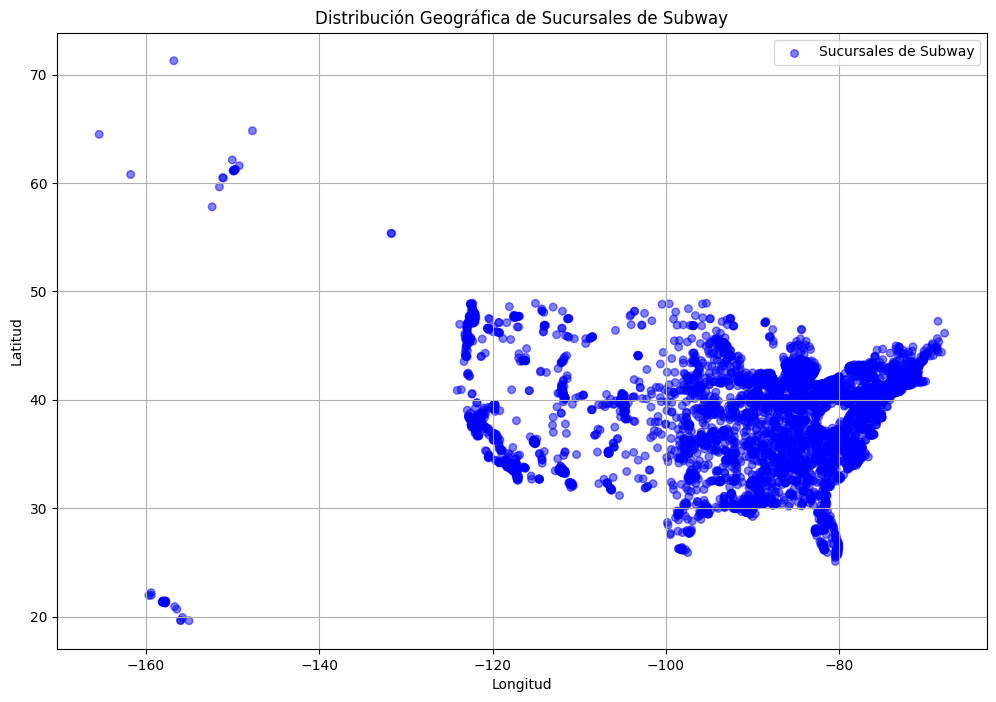

In [37]:


# Datos de latitud, longitud y número de sucursales
latitudes = subway_locations['latitude']
longitudes = subway_locations['longitude']
num_sucursales = subway_locations['num_of_subways']


size = 30

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, s=size*num_sucursales, alpha=0.5, c='blue', label='Sucursales de Subway')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de Sucursales de Subway')
plt.grid(True)


# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [38]:

# Crear un mapa centrado en una ubicación inicial (puedes ajustar estas coordenadas según tu preferencia)
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=5)  # Coordenadas de Nueva York como ejemplo

# Agregar marcadores para cada ubicación de Subway
for index, row in subway_locations.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    num_sucursales = row['num_of_subways']
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=num_sucursales * 2,  
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mapa)



mapa


# Distribución Geográfica de Sucursales de Subway

Este mapa interactivo presenta la distribución geográfica de las sucursales de Subway en función de las coordenadas de latitud y longitud. Cada punto en el mapa representa una ubicación específica donde se encuentra una sucursal de Subway. La densidad de puntos en el mapa refleja la concentración de sucursales en diferentes áreas geográficas.


Explorar el mapa de manera interactivo nos sirve para identificar áreas con mayor actividad de Subway y obtener más información sobre cada ubicación haciendo clic en los marcadores.

